In [ ]:
import pandas as pd
import numpy as np
import re
import string
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
from wordsegment import load, segment
import contractions
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
# import gensim
import pyLDAvis 
import wordcloud
import textblob 
import spacy
import textstat
import missingno as msno
import cufflinks as cf
cf.go_offline()

import warnings
#!pip install symspellpy
import matplotlib.ticker as mticker


/home/mjokhio12/venv/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [ ]:
# import pkg_resources
# from symspellpy import SymSpell, Verbosity

# sym_spell = SymSpell(max_dictionary_edit_distance=1, prefix_length=7)
# dictionary_path = pkg_resources.resource_filename(
#     "symspellpy", "frequency_dictionary_en_82_765.txt")
# bigram_path = pkg_resources.resource_filename(
#     "symspellpy", "frequency_bigramdictionary_en_243_342.txt")
# # term_index is the column of the term and count_index is the
# # column of the term frequency
# sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)
# sym_spell.load_bigram_dictionary(bigram_path, term_index=0, count_index=2)

In [ ]:
def spellCorr(text):
  # lookup suggestions for multi-word input strings (supports compound
  # splitting & merging)
  input_term = text
  # max edit distance per lookup (per single word, not per whole input string)
  suggestions = sym_spell.lookup_compound(input_term, max_edit_distance=1)
  # display suggestion term, edit distance, and term frequency
  for suggestion in suggestions:
      return suggestion.term


In [ ]:
warnings.filterwarnings('ignore')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
stop=set(stopwords.words('english'))
load()

[nltk_data] Downloading package punkt to /home/mjokhio12/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/mjokhio12/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mjokhio12/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
train1 = pd.read_csv('msproj/e_train.csv')
train1.dtypes
train1

title  \
0                                       y-zoom piano roll   
1                             buggy behavior in selection   
2                                     auto update feature   
3                      filter out noisy endpoints in logs   
4       enable pid on / pid off alarm actions for ardu...   
...                                                   ...   
149995  suggestion   getinventorylist should return ra...   
149996  decoder displays some neurovault images incorr...   
149997    parser should return an error, not an exception   
149998  errorexception  array to string conversion on ...   
149999                   ignore headings in code sections   

                                                     body  label  
0             a y-zoom on the piano roll would be useful.      1  
1       ! screenshot from 2016-02-23 21 27 40  https:/...      0  
2       hi,\r \r great job so far, @saenzramiro ! : \r...      1  
3       i think we should stop logging requests to:\r ...      1  
4       expected behavior\r alarm actions pid on and p...      0  
...                                                   ...    ...  
149995  <!-- note: anything within these brackets will...      1  
149996  as noted by @nicholst, some neurovault images ...      0  
149997  for this raml:\r \r    yaml\r  %raml 1.0\r tit...      0  
149998       see above.\r \r occurs in branch   routes  .      0  
149999  do not process headings inside quotes and code...      0  

[150000 rows x 3 columns]

In [ ]:
train2 = pd.read_csv('msproj/e_train_extra.csv')
train2.dtypes
train2

title  \
0                                     use a 8bit typeface   
1                        implement wireless m-bus binding   
2                    add multilang support for timeago.js   
3                        scaleway - seg-fault on shutdown   
4       sistema de pintura: no se guardar los nuevos p...   
...                                                   ...   
299995                       shield against invalid dates   
299996                                     fix the knight   
299997  portaudio playback binding crashes often, ubun...   
299998  add --db-path option for allowing user to spec...   
299999                 staff users cannot log in to admin   

                                                     body  label  
0       since this is meant to emulate some old arcade...      1  
1       _from  chris.pa...@googlemail.com  https://cod...      1  
2       currently it is only  en . \r required to add ...      1  
3       tbr  irc  creates a new scaleway instance with...      0  
4       este sp ya estaba asignado a un carro y se enc...      0  
...                                                   ...    ...  
299995  makes'em crash the renderer for now :|\r \r da...      0  
299996   seriously, if you do just one thing this week...      0  
299997         appear to be very unstable. relates to  17      0  
299998  add  --db-path  option with default value as  ...      1  
299999  i added admire as a staff user but he cannot l...      0  

[300000 rows x 3 columns]

In [ ]:
# append two trainsets into one trainset
train1 = pd.read_csv('msproj/e_train.csv', encoding='utf-8')
train2 = pd.read_csv('msproj/e_train_extra.csv', encoding='utf-8')
frames = [train1, train2]
train = pd.concat(frames,ignore_index=True)
train.to_csv(r'msproj/Ctrain.csv')  # combine the two trainsets in one 
train.dtypes
train

title  \
0                                       y-zoom piano roll   
1                             buggy behavior in selection   
2                                     auto update feature   
3                      filter out noisy endpoints in logs   
4       enable pid on / pid off alarm actions for ardu...   
...                                                   ...   
449995                       shield against invalid dates   
449996                                     fix the knight   
449997  portaudio playback binding crashes often, ubun...   
449998  add --db-path option for allowing user to spec...   
449999                 staff users cannot log in to admin   

                                                     body  label  
0             a y-zoom on the piano roll would be useful.      1  
1       ! screenshot from 2016-02-23 21 27 40  https:/...      0  
2       hi,\r \r great job so far, @saenzramiro ! : \r...      1  
3       i think we should stop logging requests to:\r ...      1  
4       expected behavior\r alarm actions pid on and p...      0  
...                                                   ...    ...  
449995  makes'em crash the renderer for now :|\r \r da...      0  
449996   seriously, if you do just one thing this week...      0  
449997         appear to be very unstable. relates to  17      0  
449998  add  --db-path  option with default value as  ...      1  
449999  i added admire as a staff user but he cannot l...      0  

[450000 rows x 3 columns]

In [ ]:
test = pd.read_csv('msproj/e_test.csv')
test

title  \
0      config question  path-specific environment var...   
1                                       crash indien vol   
2                                   unable to mine rocks   
3                       not all whitelists are processed   
4              add ctx menu for idafree 70 and idafree 5   
...                                                  ...   
29995  closing a project with running simulations doe...   
29996  missing table description on db2 / db2 iseries...   
29997            cases when notification should be shown   
29998        ip-2914. errors in idea2client when syncing   
29999          portable open system pharmacology version   

                                                    body  
0      issue description or question\r \r hey @artemg...  
1                    de simulator crasht als hij vol zit  
2      sarkasmo starting today, when i hit enter  act...  
3      create following rules... order of creation is...  
4      associated with .dll, .dll_, .exe, .exe_, .sc,...  
...                                                  ...  
29995  should the client take care of that or should ...  
29996  on tables, fields descriptions and tooltip are...  
29997  - new message - always but not on chat screen\...  
29998  i see the following errors in the logs:\r \r  ...  
29999  hello,\r first of all, i would like to thank t...  

[30000 rows x 2 columns]

In [ ]:
tr = pd.read_csv('msproj/sample_submission.csv')
tr['label'] = tr['label'].astype(int)
tr.dtypes
tr

label
0          0
1          0
2          0
3          0
4          0
...      ...
29995      0
29996      0
29997      0
29998      0
29999      0

[30000 rows x 1 columns]

In [ ]:
test['label'] = tr 
test

title  \
0      config question  path-specific environment var...   
1                                       crash indien vol   
2                                   unable to mine rocks   
3                       not all whitelists are processed   
4              add ctx menu for idafree 70 and idafree 5   
...                                                  ...   
29995  closing a project with running simulations doe...   
29996  missing table description on db2 / db2 iseries...   
29997            cases when notification should be shown   
29998        ip-2914. errors in idea2client when syncing   
29999          portable open system pharmacology version   

                                                    body  label  
0      issue description or question\r \r hey @artemg...      0  
1                    de simulator crasht als hij vol zit      0  
2      sarkasmo starting today, when i hit enter  act...      0  
3      create following rules... order of creation is...      0  
4      associated with .dll, .dll_, .exe, .exe_, .sc,...      0  
...                                                  ...    ...  
29995  should the client take care of that or should ...      0  
29996  on tables, fields descriptions and tooltip are...      0  
29997  - new message - always but not on chat screen\...      0  
29998  i see the following errors in the logs:\r \r  ...      0  
29999  hello,\r first of all, i would like to thank t...      0  

[30000 rows x 3 columns]

In [ ]:
df = pd.concat([train, test])
df.to_csv(r'msproj/Cdata.csv')   # One complete dataset (train + test) 
df

title  \
0                                      y-zoom piano roll   
1                            buggy behavior in selection   
2                                    auto update feature   
3                     filter out noisy endpoints in logs   
4      enable pid on / pid off alarm actions for ardu...   
...                                                  ...   
29995  closing a project with running simulations doe...   
29996  missing table description on db2 / db2 iseries...   
29997            cases when notification should be shown   
29998        ip-2914. errors in idea2client when syncing   
29999          portable open system pharmacology version   

                                                    body  label  
0            a y-zoom on the piano roll would be useful.      1  
1      ! screenshot from 2016-02-23 21 27 40  https:/...      0  
2      hi,\r \r great job so far, @saenzramiro ! : \r...      1  
3      i think we should stop logging requests to:\r ...      1  
4      expected behavior\r alarm actions pid on and p...      0  
...                                                  ...    ...  
29995  should the client take care of that or should ...      0  
29996  on tables, fields descriptions and tooltip are...      0  
29997  - new message - always but not on chat screen\...      0  
29998  i see the following errors in the logs:\r \r  ...      0  
29999  hello,\r first of all, i would like to thank t...      0  

[480000 rows x 3 columns]

In [ ]:
print('Total null values for each column:\n', df.isnull().sum())

Total null values for each column:
 title    0
body     0
label    0
dtype: int64


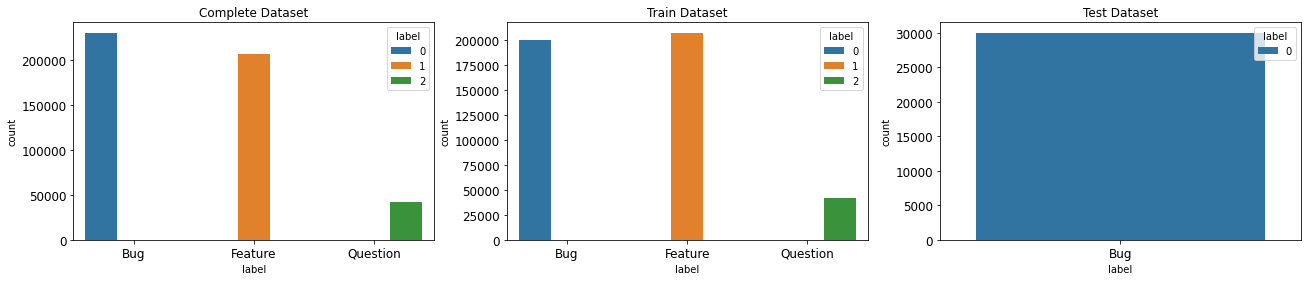

In [ ]:
fig, axes = plt.subplots(ncols=3,figsize=(22,4))

sns.countplot(x=df['label'], hue=df['label'],ax=axes[0])
sns.countplot(x=train['label'],  hue=train['label'], ax=axes[1])
sns.countplot(x=test['label'],  hue=test['label'], ax=axes[2])

axes[0].set_xticklabels(['Bug', 'Feature', 'Question'])
axes[1].set_xticklabels(['Bug', 'Feature', 'Question'])
axes[2].set_xticklabels(['Bug'])

axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)
axes[2].tick_params(axis='x', labelsize=12)
axes[2].tick_params(axis='y', labelsize=12)

axes[0].set_title('Complete Dataset', fontsize=12)
axes[1].set_title('Train Dataset', fontsize=12)
axes[2].set_title('Test Dataset', fontsize=12)
plt.show()


In [ ]:
def plot_wordcloud(text):

    ### to present wordcloud we are temporarily removing stop words and lemmatizing them as they are the most frequent words. 
    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud( 
        background_color='white', 
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=5,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(20, 20))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()

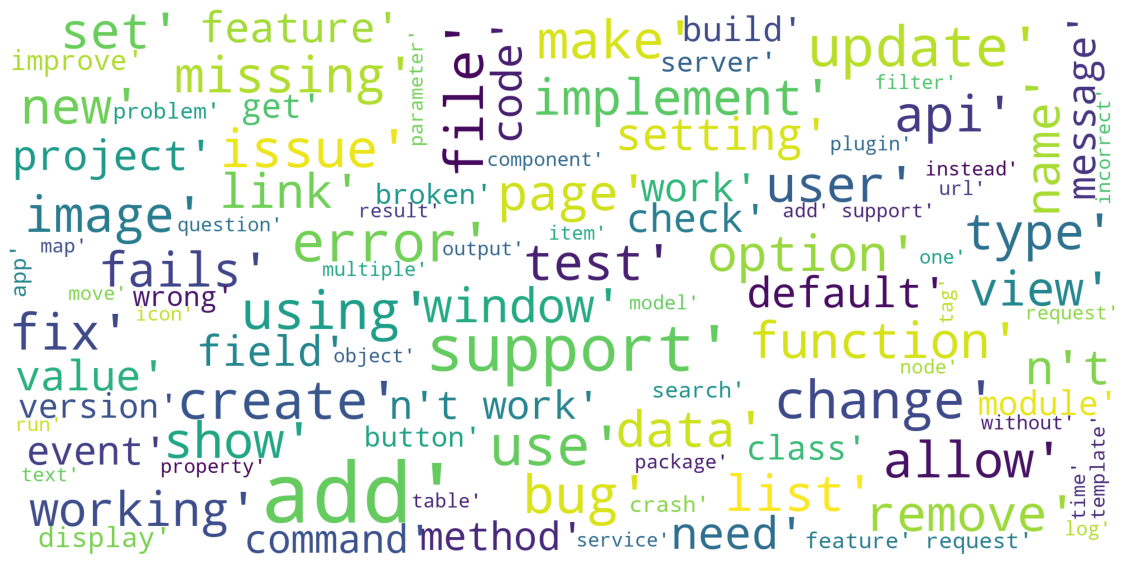

In [ ]:
plot_wordcloud(df['title'])

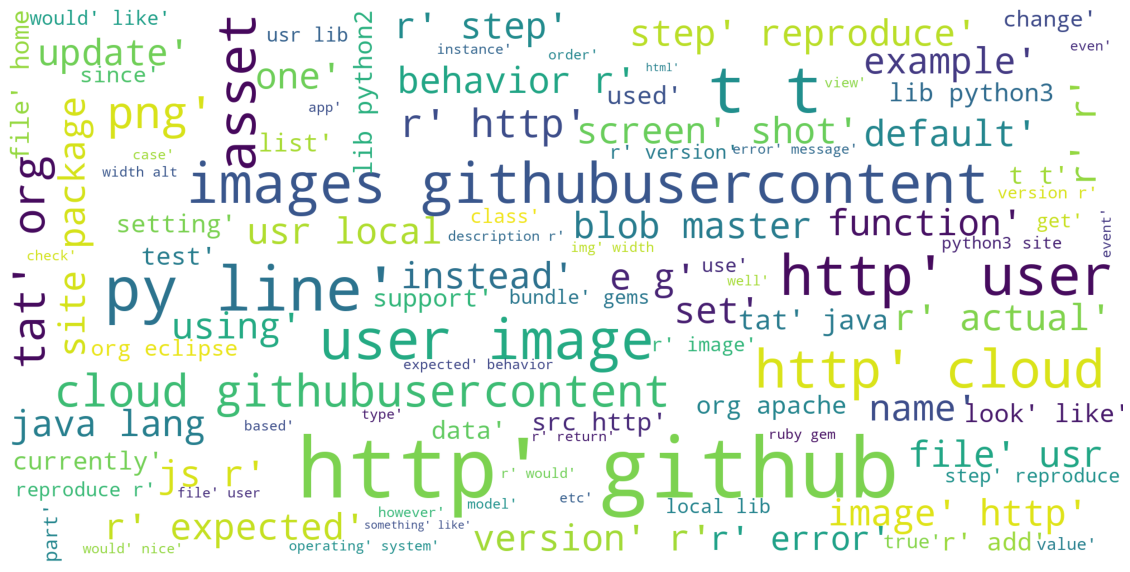

In [ ]:
plot_wordcloud(df['body'])

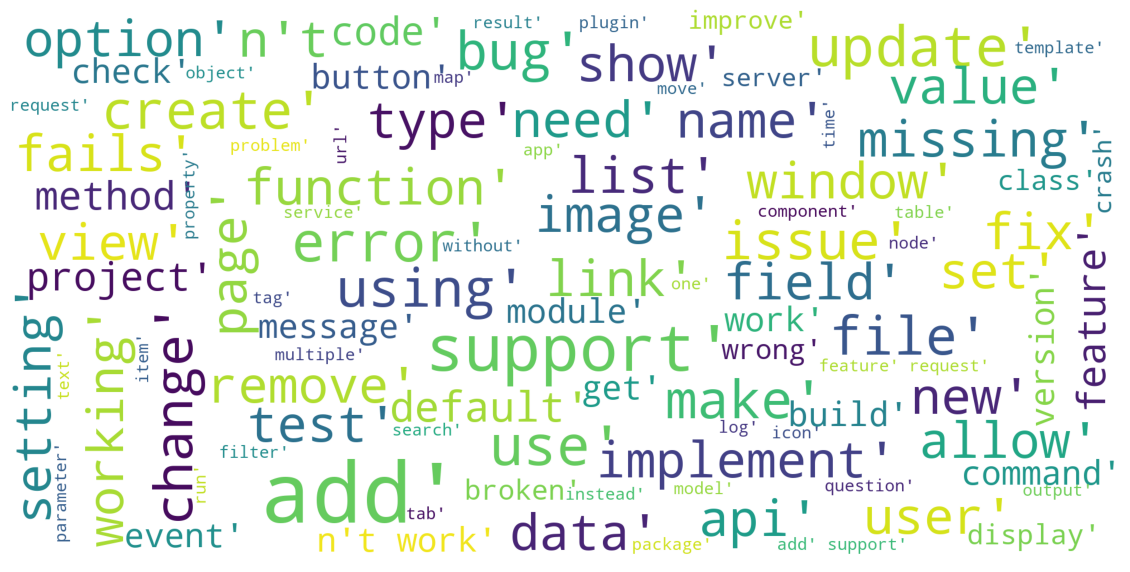

In [ ]:
plot_wordcloud(train['title'])

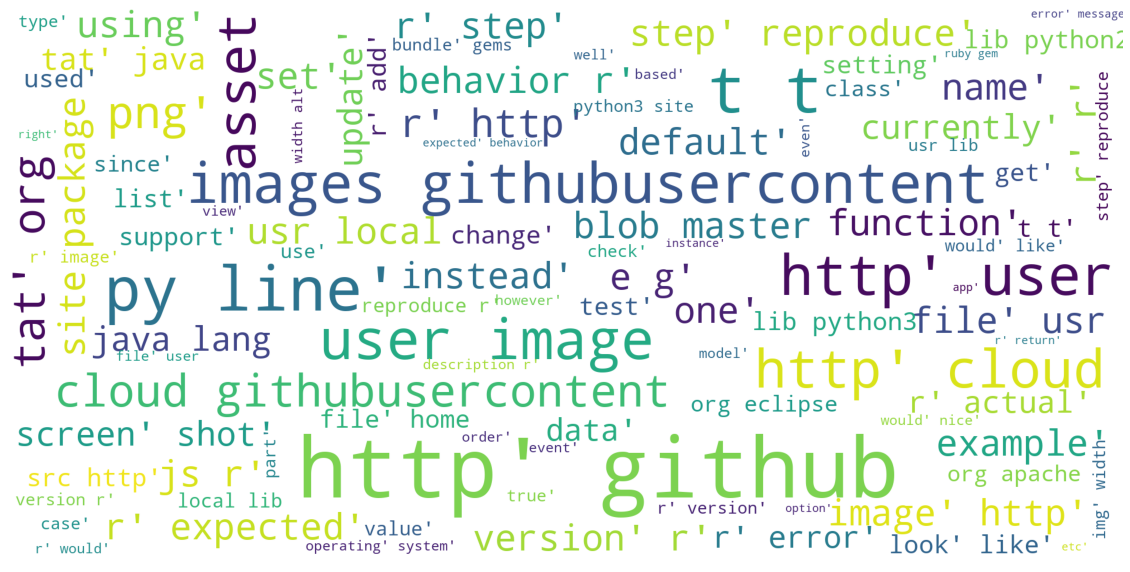

In [ ]:
plot_wordcloud(train['body'])

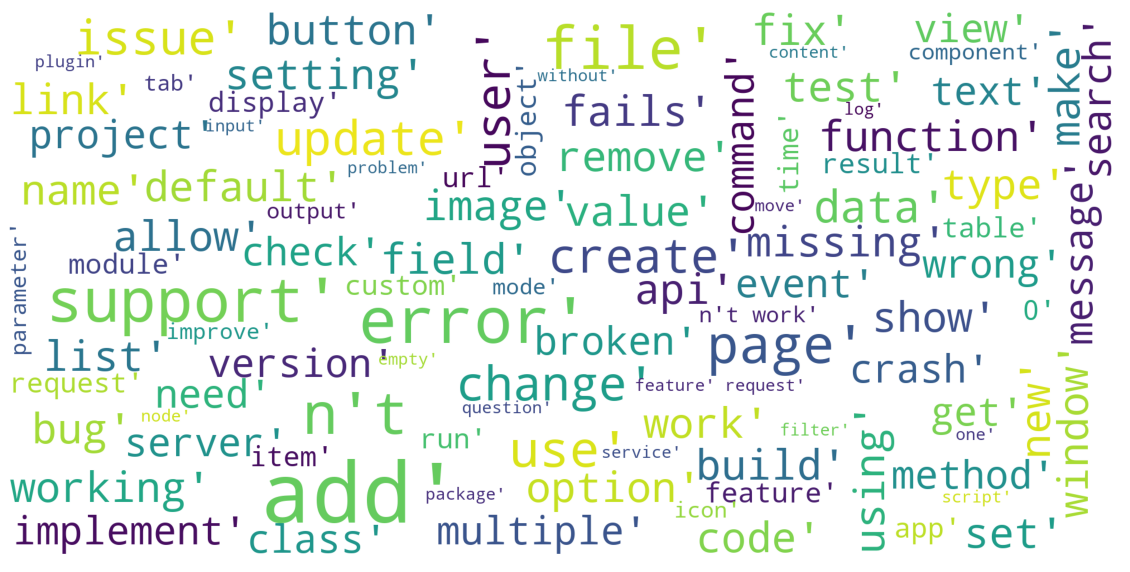

In [ ]:
plot_wordcloud(test['title'])

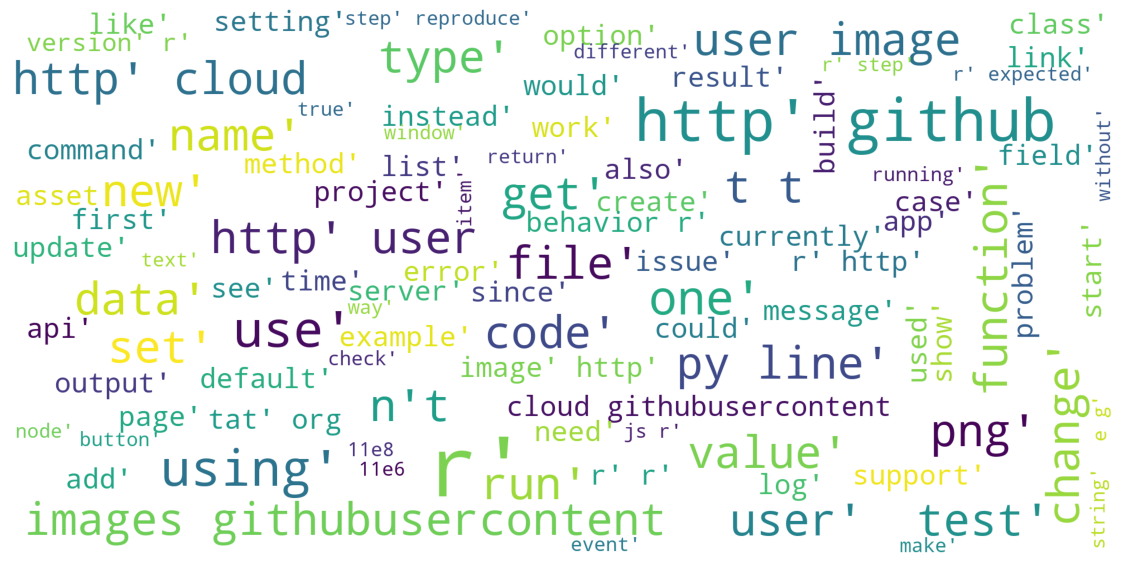

In [ ]:
plot_wordcloud(test['body'])

In [ ]:
# word_count
train['title_word_count'] = train['title'].apply(lambda x: len(str(x).split()))
train['body_word_count'] = train['body'].apply(lambda x: len(str(x).split()))

test['title_word_count'] = test['title'].apply(lambda x: len(str(x).split()))
test['body_word_count'] = test['body'].apply(lambda x: len(str(x).split()))

# unique_word_count
train['title_unique_word_count'] = train['title'].apply(lambda x: len(set(str(x).split())))
train['body_unique_word_count'] = train['body'].apply(lambda x: len(set(str(x).split())))

test['title_unique_word_count'] = test['title'].apply(lambda x: len(set(str(x).split())))
test['body_unique_word_count'] = test['body'].apply(lambda x: len(set(str(x).split())))

# stop_word_count
train['title_stop_word_count'] = train['title'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
train['body_stop_word_count'] = train['body'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

test['title_stop_word_count'] = test['title'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
test['body_stop_word_count'] = test['body'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

# mean_word_length
train['title_mean_word_length'] = train['title'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
train['body_mean_word_length'] = train['body'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

test['title_mean_word_length'] = test['title'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
test['body_mean_word_length'] = test['body'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# char_count
train['title_char_count'] = train['title'].apply(lambda x: len(str(x)))
train['body_char_count'] = train['body'].apply(lambda x: len(str(x)))

test['title_char_count'] = test['title'].apply(lambda x: len(str(x)))
test['body_char_count'] = test['body'].apply(lambda x: len(str(x)))

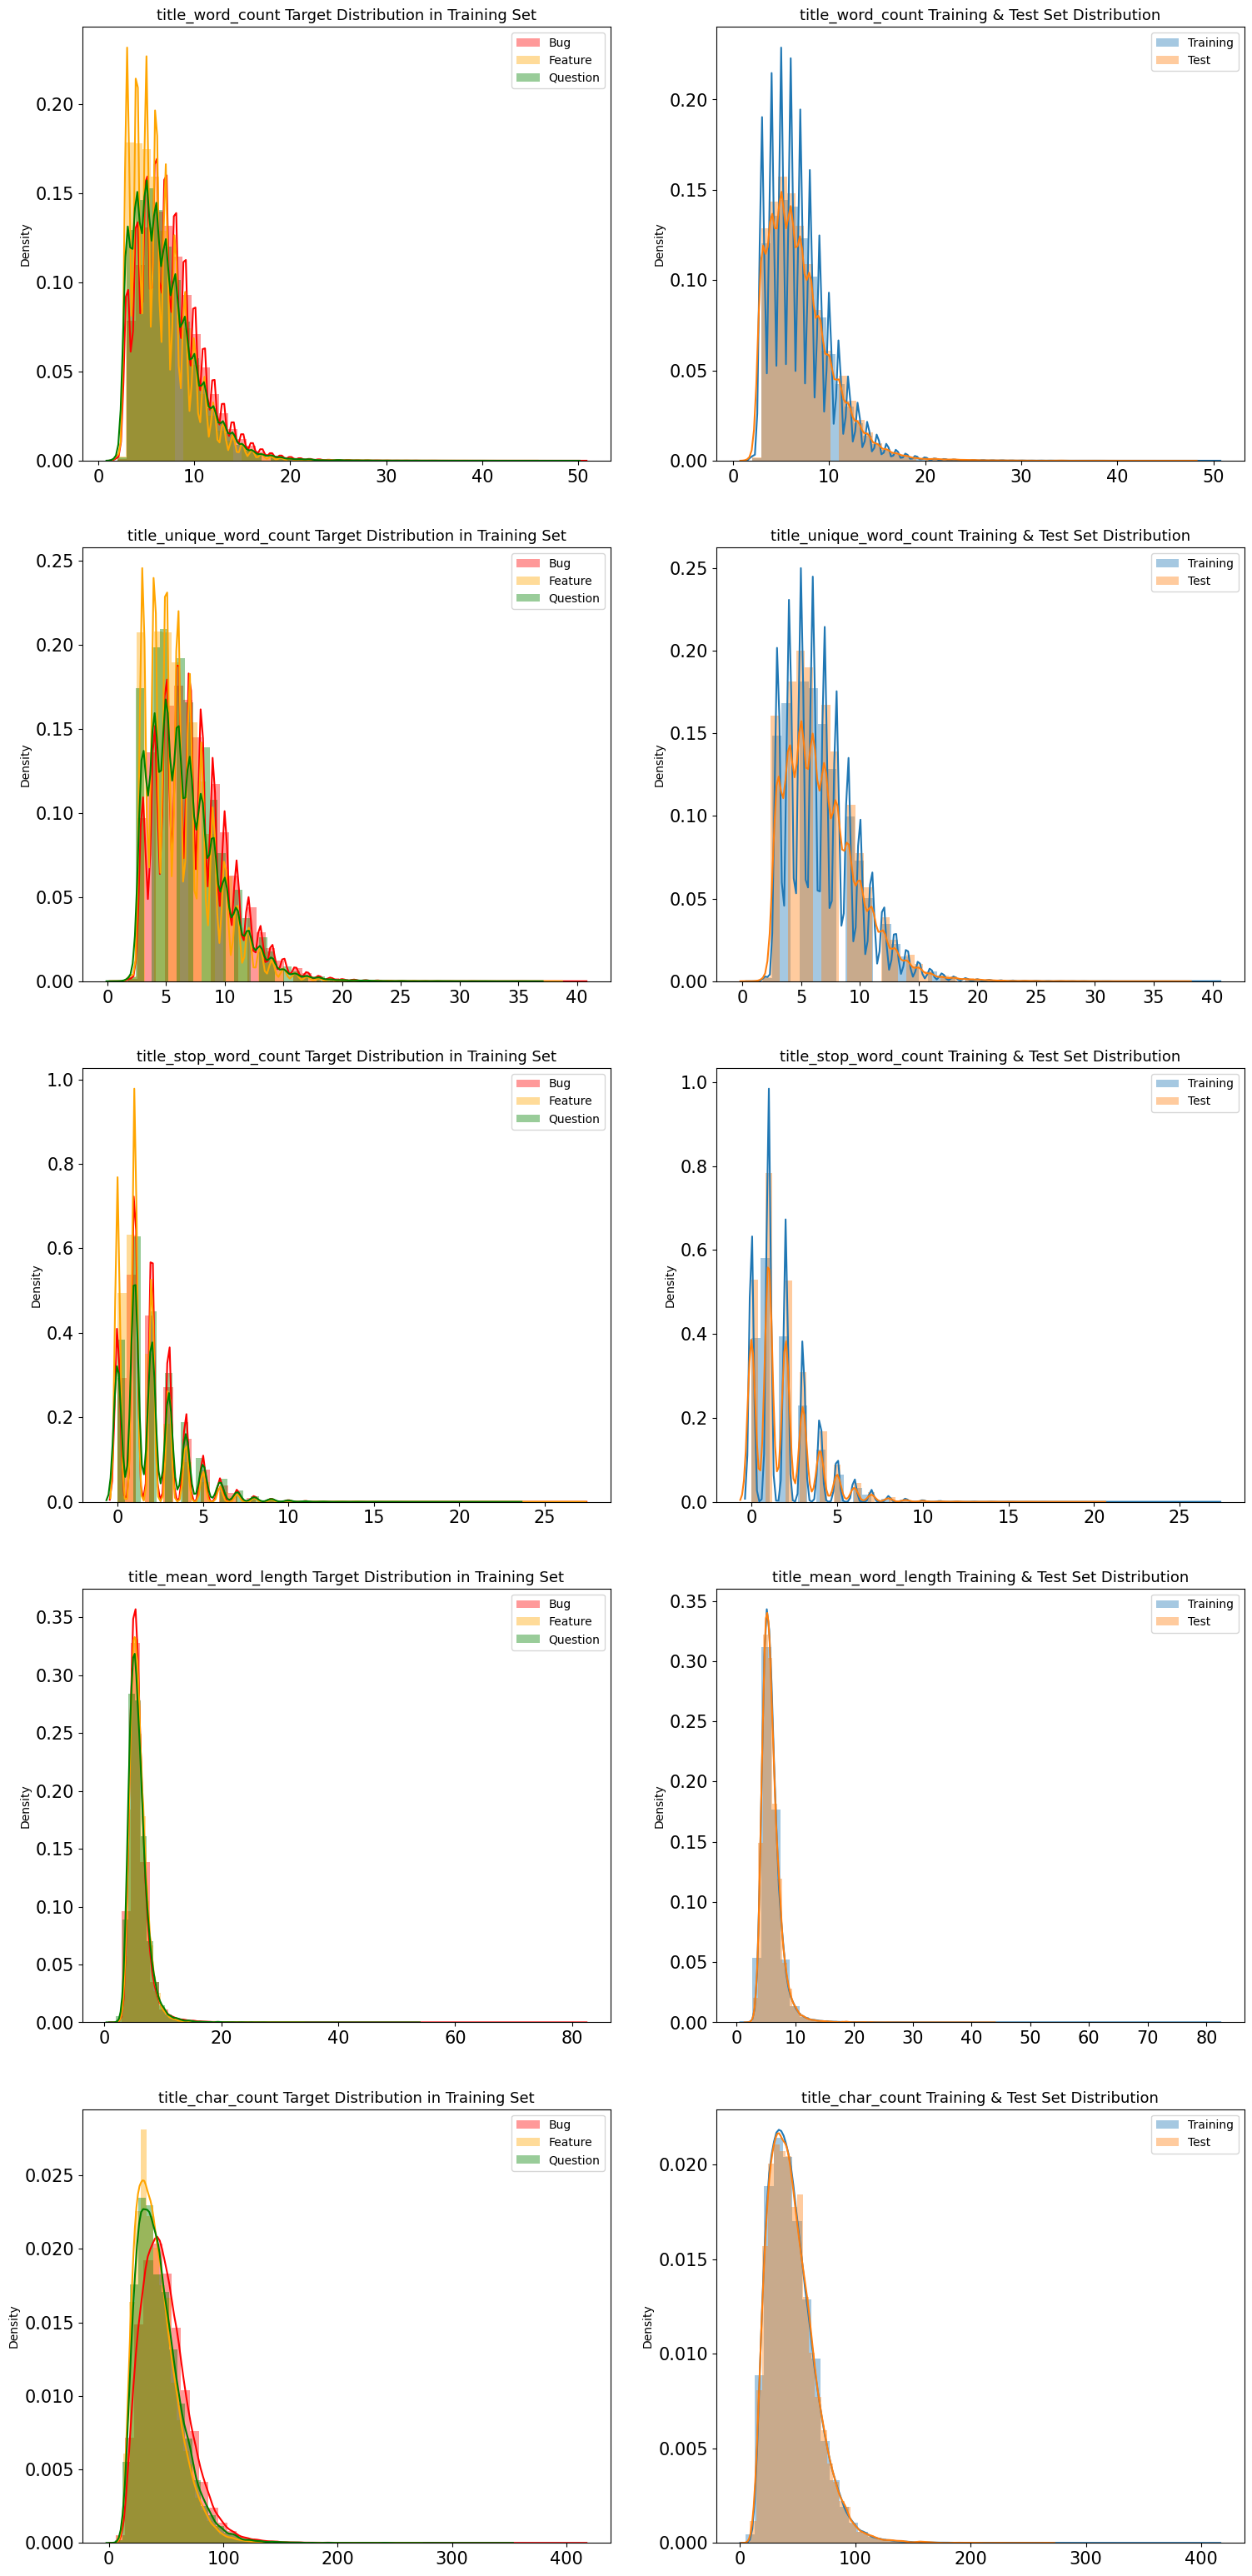

In [ ]:
title_meta_data = ['title_word_count', 'title_unique_word_count', 'title_stop_word_count', 'title_mean_word_length', 'title_char_count']
B = train['label'] == 0  # B for bug
F = train['label'] == 1  # F for Feature
Q = train['label'] == 2  # Q for Question

fig, axes = plt.subplots(ncols=2, nrows=len(title_meta_data), figsize=(18,40), dpi=100)

for i, feature in enumerate(title_meta_data):
    
    sns.distplot(train.loc[B][feature], label='Bug', ax=axes[i][0], color='red')
    sns.distplot(train.loc[F][feature], label='Feature', ax=axes[i][0], color='orange')
    sns.distplot(train.loc[Q][feature], label='Question', ax=axes[i][0], color='green')

    sns.distplot(train[feature], label='Training', ax=axes[i][1])
    sns.distplot(test[feature], label='Test', ax=axes[i][1])
    
    for j in range(2):
        axes[i][j].set_xlabel('')
        axes[i][j].tick_params(axis='x', labelsize=15)
        axes[i][j].tick_params(axis='y', labelsize=15)
        axes[i][j].legend()
    
    axes[i][0].set_title(f'{feature} Target Distribution in Training Set', fontsize=13)
    axes[i][1].set_title(f'{feature} Training & Test Set Distribution', fontsize=13)

plt.show()

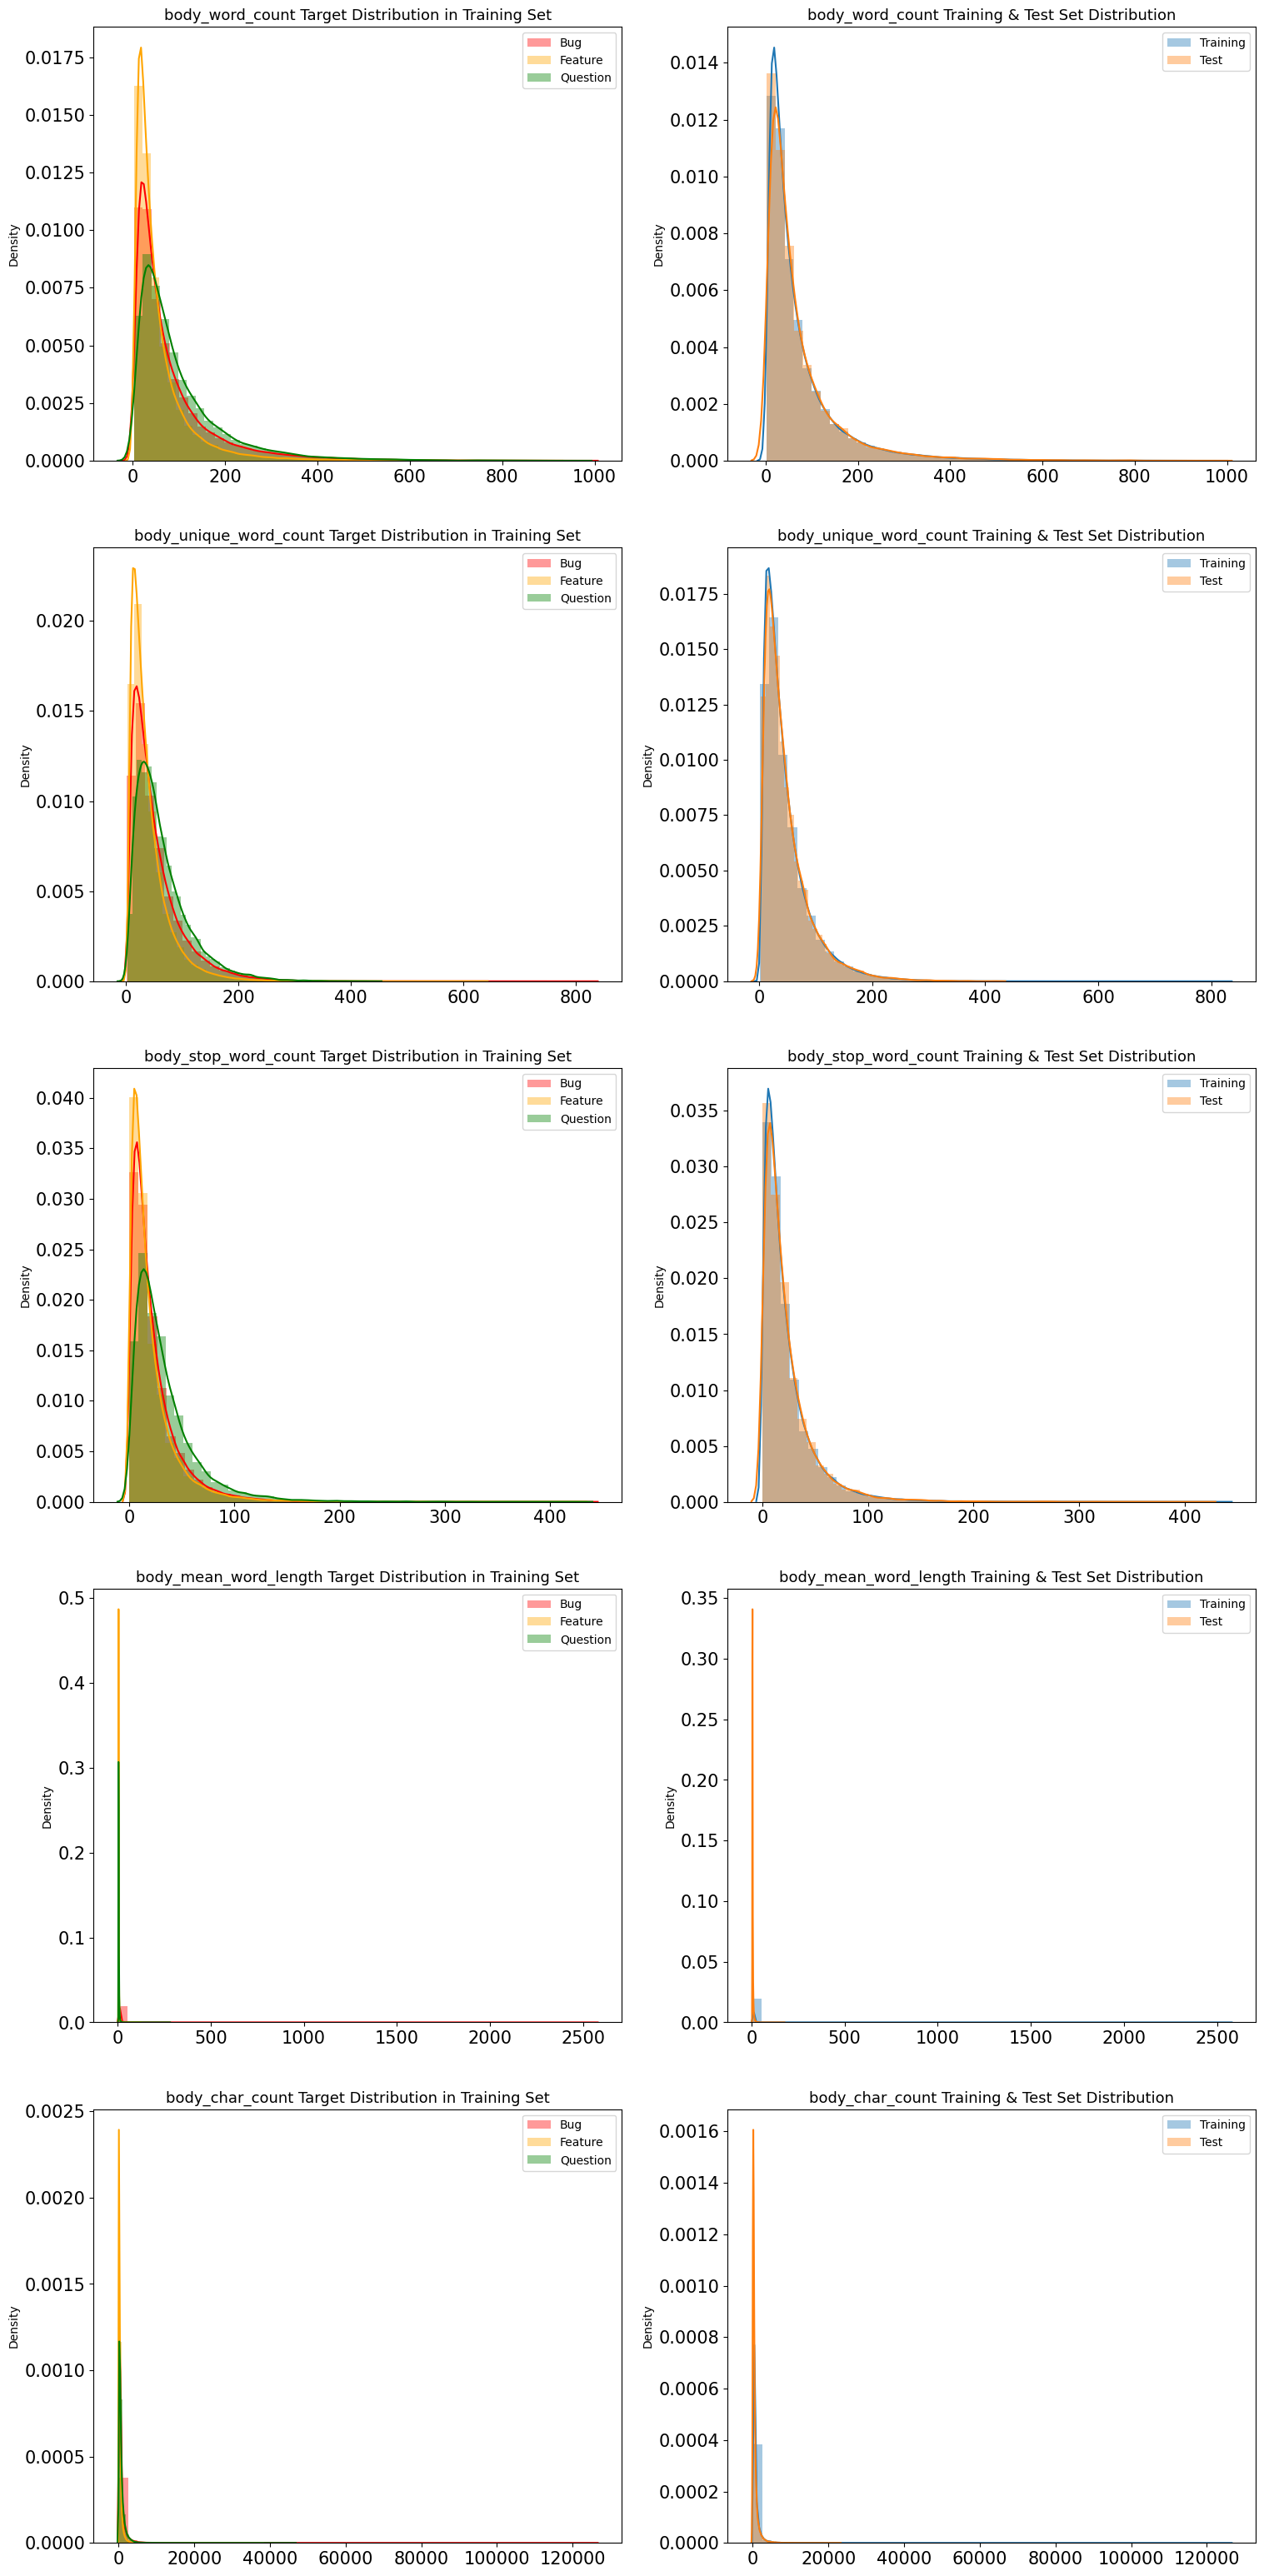

In [ ]:
body_meta_data = ['body_word_count', 'body_unique_word_count', 'body_stop_word_count', 'body_mean_word_length', 'body_char_count']
B = train['label'] == 0  # B for bug
F = train['label'] == 1  # F for Feature
Q = train['label'] == 2  # Q for Question

fig, axes = plt.subplots(ncols=2, nrows=len(body_meta_data), figsize=(18,40), dpi=100)

for i, feature in enumerate(body_meta_data):
    
    sns.distplot(train.loc[B][feature], label='Bug', ax=axes[i][0], color='red')
    sns.distplot(train.loc[F][feature], label='Feature', ax=axes[i][0], color='orange')
    sns.distplot(train.loc[Q][feature], label='Question', ax=axes[i][0], color='green')

    sns.distplot(train[feature], label='Training', ax=axes[i][1])
    sns.distplot(test[feature], label='Test', ax=axes[i][1])
    
    for j in range(2):
        axes[i][j].set_xlabel('')
        axes[i][j].tick_params(axis='x', labelsize=15)
        axes[i][j].tick_params(axis='y', labelsize=15)
        axes[i][j].legend()
    
    axes[i][0].set_title(f'{feature} Target Distribution in Training Set', fontsize=13)
    axes[i][1].set_title(f'{feature} Training & Test Set Distribution', fontsize=13)

plt.show()

In [ ]:
df['text'] = df['title'].str.cat(df['body'],sep=" ")


In [ ]:
train['text'] = train['title'].str.cat(train['body'],sep=" ")

In [ ]:
test['text'] = test['title'].str.cat(test['body'],sep=" ")

In [ ]:
new_df = df[['text','label']].copy()

In [ ]:
# word_count
train['word_count'] = train['text'].apply(lambda x: len(str(x).split()))
test['word_count'] = test['text'].apply(lambda x: len(str(x).split()))


# unique_word_count
train['unique_word_count'] = train['text'].apply(lambda x: len(set(str(x).split())))
test['unique_word_count'] = test['text'].apply(lambda x: len(set(str(x).split())))


# stop_word_count
train['stop_word_count'] = train['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
test['stop_word_count'] = test['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))


# # mean_word_length
train['mean_word_length'] = train['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
test['mean_word_length'] = test['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))


# # char_count
train['char_count'] = train['text'].apply(lambda x: len(str(x)))
test['char_count'] = test['text'].apply(lambda x: len(str(x)))


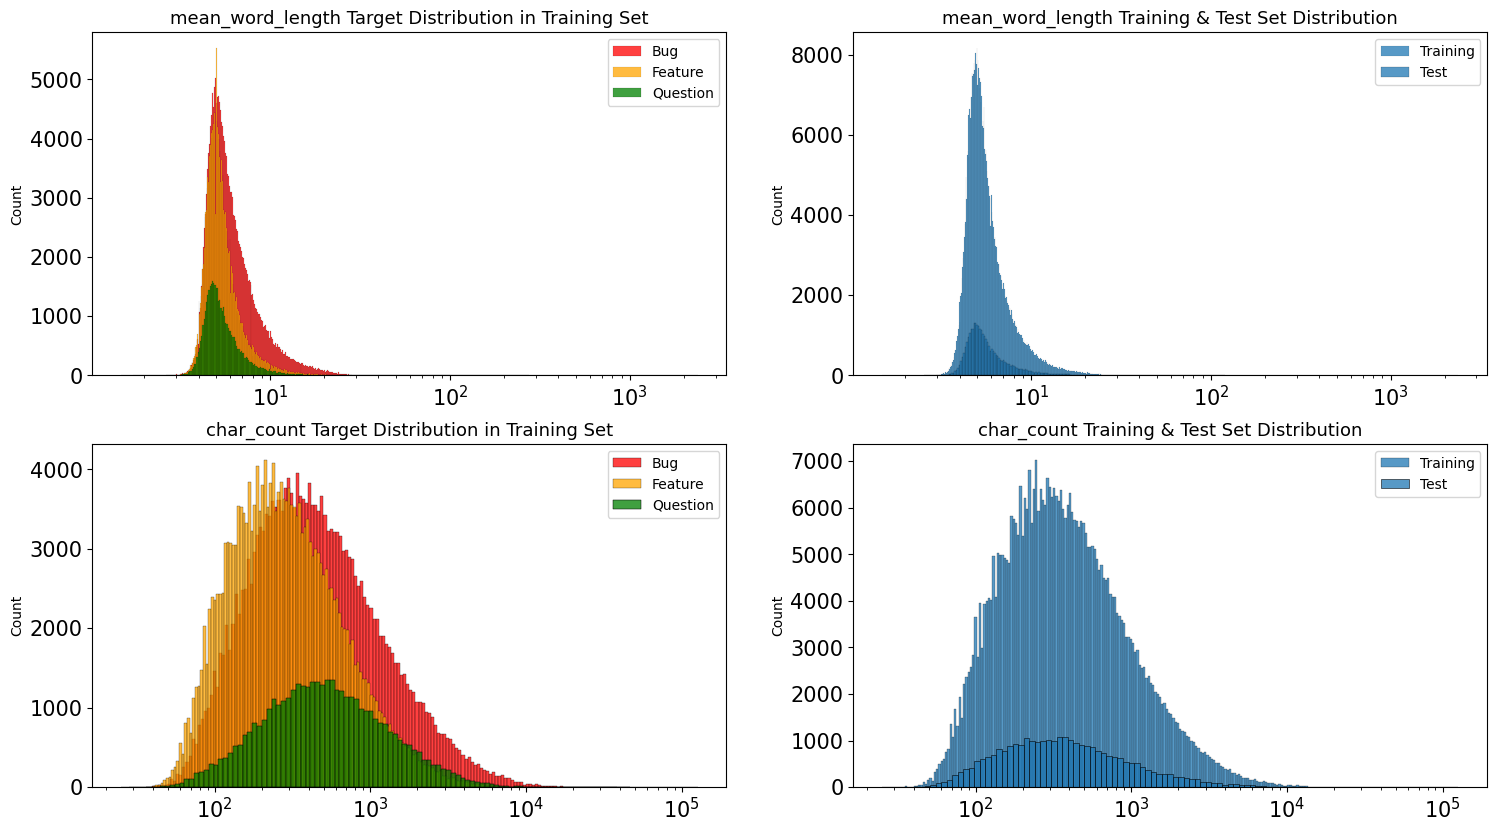

In [ ]:
meta_data = ['mean_word_length', 'char_count' ]
B = train['label'] == 0  # B for bug
F = train['label'] == 1  # F for Feature
Q = train['label'] == 2  # Q for Question

fig, axes = plt.subplots(ncols=2, nrows=len(meta_data), figsize=(18,10), dpi=100)
# sns.despine(fig)

for i, feature in enumerate(meta_data):
    
    sns.histplot(train.loc[B][feature], label='Bug', ax=axes[i][0], color='red' , log_scale=True)
    sns.histplot(train.loc[F][feature], label='Feature', ax=axes[i][0], color='orange' , log_scale=True)
    sns.histplot(train.loc[Q][feature], label='Question', ax=axes[i][0], color='green' , log_scale=True)

    sns.histplot(train[feature], label='Training', ax=axes[i][1], log_scale=True)
    sns.histplot(test[feature], label='Test', ax=axes[i][1], log_scale=True)
    
    for j in range(2):
        axes[i][j].set_xlabel('')
        axes[i][j].tick_params(axis='x', labelsize=15)
        axes[i][j].tick_params(axis='y', labelsize=15)
        axes[i][j].legend()
    
    axes[i][0].set_title(f'{feature} Target Distribution in Training Set', fontsize=13)
    axes[i][1].set_title(f'{feature} Training & Test Set Distribution', fontsize=13)


plt.show()

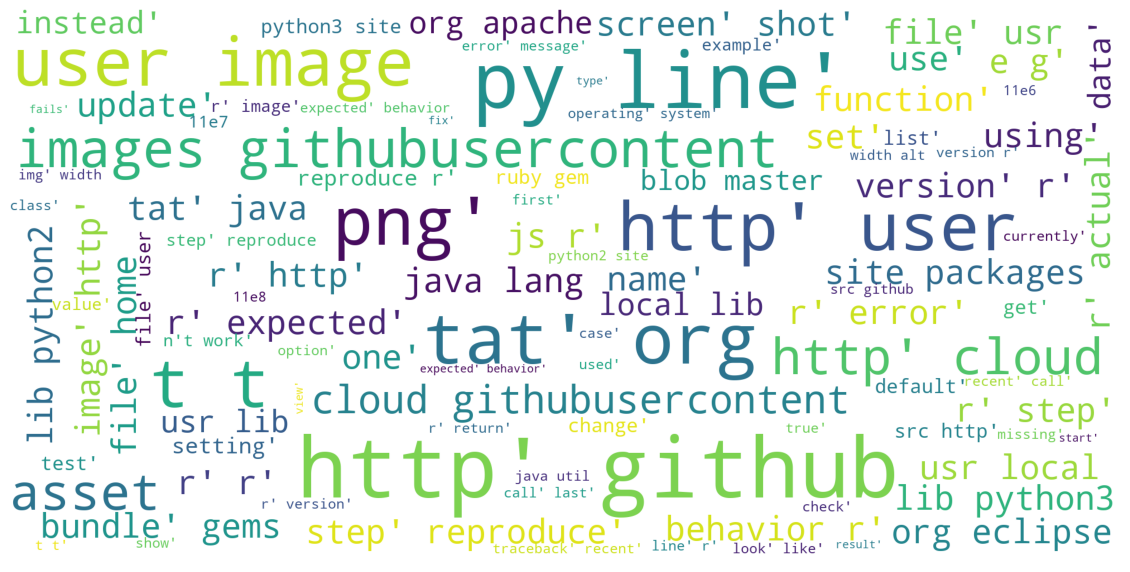

In [ ]:
txt = df.loc[df["label"] == 0, "text"]
plot_wordcloud(txt)

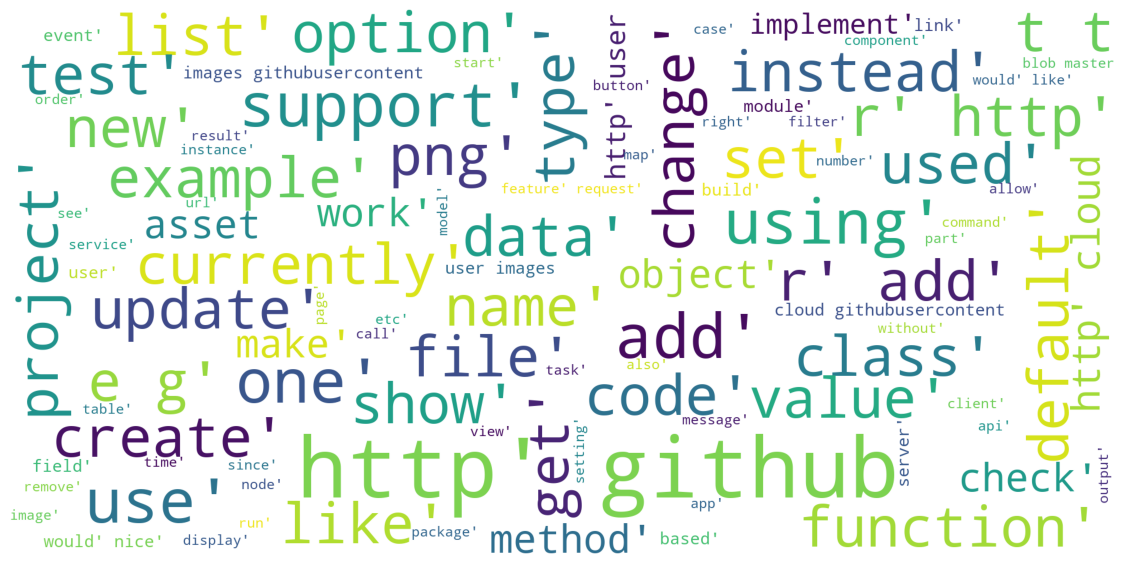

In [ ]:
txt = df.loc[df["label"] == 1, "text"]
plot_wordcloud(txt)

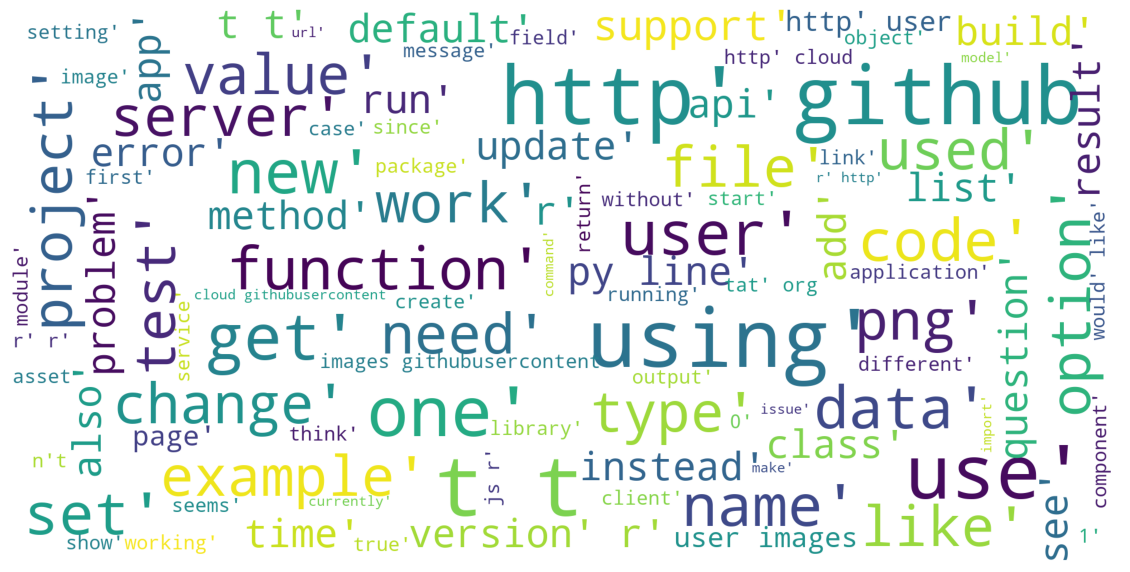

In [ ]:
txt = df.loc[df["label"] == 2, "text"]
plot_wordcloud(txt)

In [ ]:
df.drop(columns = ['title','body'], inplace = True)

In [ ]:
train.drop(columns = ['title','body'], inplace = True)

In [ ]:
test.drop(columns = ['title','body'], inplace = True)

In [ ]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('#\w*[a-zA-Z]\w*', '',text)  #removing hashtags
    text = re.sub('(?<=\[)[^]]+(?=\])', '', text) 
    text = text.replace('/', '') # remove forward slashes so that the complete urls are segmented 
    text = re.sub('https?://\S+|www\.\S+', '', text)  #url and http / https
    text = re.sub("<!--.*?",' ', text)  # remove < > brackets 
    # text = re.sub('<.*?>+', '', text)  # html tags
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)  # remove punctuations
    text = re.sub('\n', ' ', text)   #remove \n 
    text = re.sub('\r', ' ', text)   #remove \n 
    text = re.sub('\w*\d\w*', ' ', text)   #remove words containing numbers
    text = re.sub("(\\W|\\d)"," ",text) 
    text = re.sub(r'[^\s\S]+\W', ' ', text) 
    text = text.strip() # remove trailing spaces

    return text

In [ ]:
clean_text( "Hi, this is Me MarVi.I'm looking @john mike is been stolen. it is funny word! Prof. Dr. Jonn's ")

'hi  this is me marvi i m looking  john mike is been stolen  it is funny word  prof  dr  jonn s'

In [ ]:
df['text'] = df['text'].apply(lambda x:clean_text(x))

train['text'] = train['text'].apply(lambda x:clean_text(x))
test['text'] = test['text'].apply(lambda x:clean_text(x))

In [ ]:
df

label                                               text
0          1  y zoom piano roll a y zoom on the piano roll w...
1          0  buggy behavior in selection   screenshot from ...
2          1  auto update feature hi  r  r great job so far ...
3          1  filter out noisy endpoints in logs i think we ...
4          0  enable pid on  pid off alarm actions for   exp...
...      ...                                                ...
29995      0  closing a project with running simulations doe...
29996      0  missing table description on      iseriesas   ...
29997      0  cases when notification should be shown   new ...
29998      0  ip    errors in   when syncing i see the follo...
29999      0  portable open system pharmacology version hell...

[480000 rows x 2 columns]

In [ ]:
test['text'].head(10)

0    config question  path specific environment var...
1    crash indien vol de simulator crasht als hij v...
2    unable to mine rocks sarkasmo starting today  ...
3    not all whitelists are processed create follow...
4    add ctx menu for idafree   and idafree   assoc...
5    multi day bookings are no longer visually repr...
6    simplesmtp can corrupt messages  occasionally ...
7    tests  test suite for distributed setup  curre...
8    devhelp build is broken  r   file   pgi docgen...
9    multiple snackbar like toast  its very cool fe...
Name: text, dtype: object

In [ ]:
train['text'].head(10)

0    y zoom piano roll a y zoom on the piano roll w...
1    buggy behavior in selection   screenshot from ...
2    auto update feature hi  r  r great job so far ...
3    filter out noisy endpoints in logs i think we ...
4    enable pid on  pid off alarm actions for   exp...
5    script stopped adding video s a recent change ...
6    add the translations of       beta   release e...
7    proposal  loadtranslation   to lazy load scope...
8    bot should post to listings periodically inste...
9    en la org ull esit pl   people info nico produ...
Name: text, dtype: object

In [ ]:
def preprocess_text(text):
  '''method takes clean text to further preprocess it: 
    removes stop words , removes words with less then 2 chars , 
    performs word segmentation and finally lemmatize the text'''
  words = []
  lem=WordNetLemmatizer()
  for tokn in text.split():
    if (tokn not in stop and len(tokn)>2):
      for x in segment(tokn):
        words.append(x)
      words=[lem.lemmatize(w) for w in words if len(w)>2]
  return " ".join(words) 

In [ ]:
def _preprocess_text(text):
        corpus=[]
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]
            words=[lem.lemmatize(w) for w in words if len(w)>2]
            corpus.append(words)
        return corpus


In [ ]:
# df['text']= preprocess_text(df['text'])
df['text'] = df['text'].apply(lambda x:preprocess_text(x))

In [ ]:
train['text'] = train['text'].apply(lambda x:preprocess_text(x))
train

label                                               text
0           1       zoom piano roll zoom piano roll would useful
1           0  buggy behavior selection screenshot http cloud...
2           1  auto update feature great job far saenz ramiro...
3           1  filter noisy endpoint log think stop logging r...
4           0  enable pid pid alarm action expected behavior ...
...       ...                                                ...
449995      0  shield invalid date make crash renderer date f...
449996      0                fix knight seriously one thing week
449997      0  portaudio playback binding crash often ubuntu ...
449998      1  add path option allowing user specify custom d...
449999      0  staff user can not log admin added admire staf...

[450000 rows x 2 columns]

In [ ]:
test['text'] = test['text'].apply(lambda x:preprocess_text(x))
test

label                                               text
0          0  config question path specific environment vari...
1          0           crash indien vol simulator crash hij vol
2          0  unable mine rock sark starting today hit enter...
3          0  whitelists processed create following rule ord...
4          0  add ctx menu ida free ida free associated dll ...
...      ...                                                ...
29995      0  closing project running simulation stop simula...
29996      0  missing table description iseries driver table...
29997      0  case notification shown new message always cha...
29998      0  error syncing see following error log error ja...
29999      0  portable open system pharmacology version hell...

[30000 rows x 2 columns]

In [ ]:
header = ["text", "label"]

In [ ]:
train.to_csv(r'msproj/clean_train3.csv', columns= header)

In [ ]:
test.to_csv(r'msproj/clean_test3.csv', columns= header)

In [ ]:
df.to_csv(r'msproj/clean_compl_data3.csv', columns= header)